In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected='true')
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full = pd.read_csv('/content/drive/MyDrive/bolivia_covid19_daily.csv', parse_dates = True, index_col = 0)
elec = pd.DataFrame(full.pop('active'))
region = pd.DataFrame(full.pop('region'))
full = full.join(elec)



In [ ]:
full.head()

,cases,recovered,deceased,population,active_per_10k,deceased_per_million,suceptible,removed,active
date,,,,,,,,,
2020-03-21,2,0,0,2028639,0.009859,0.0,2028637,0,2
2020-03-22,3,0,0,2028639,0.014788,0.0,2028636,0,3
2020-03-23,3,0,0,2028639,0.014788,0.0,2028636,0,3
2020-03-24,3,0,0,2028639,0.014788,0.0,2028636,0,3
2020-03-25,3,0,0,2028639,0.014788,0.0,2028636,0,3


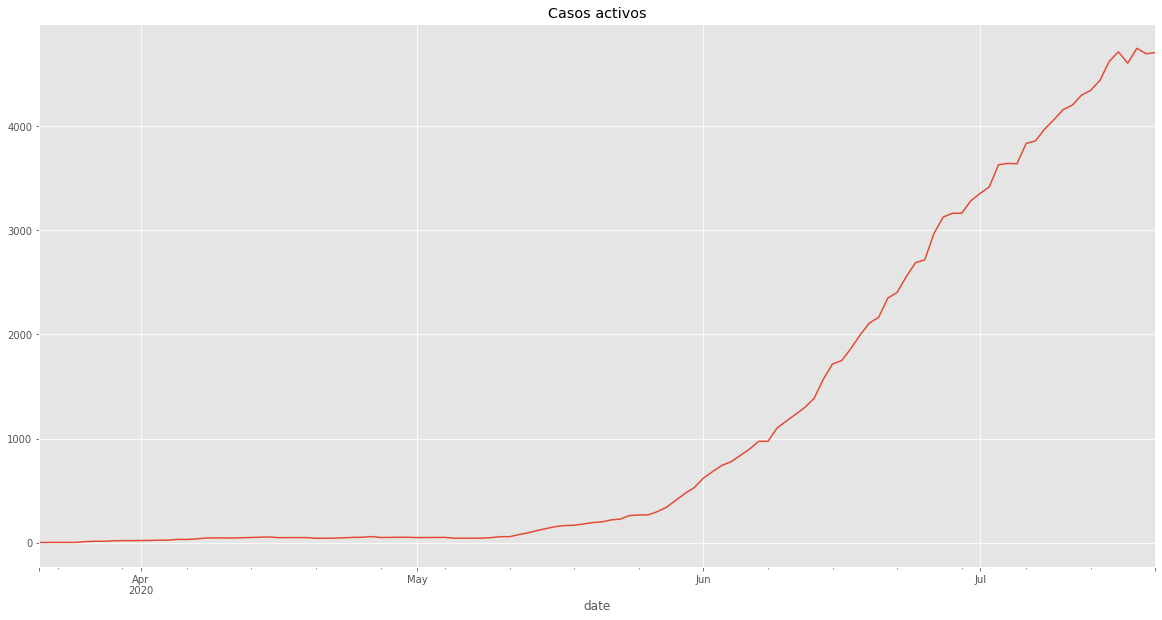

In [ ]:
plt.style.use('ggplot')
full['active'].plot(title='Casos activos', figsize=(20,10));

In [ ]:
full1=full.reset_index()['active']
full1


0         2
1         3
2         3
3         3
4         3
       ... 
117    4715
118    4606
119    4749
120    4697
121    4708
Name: active, Length: 122, dtype: int64

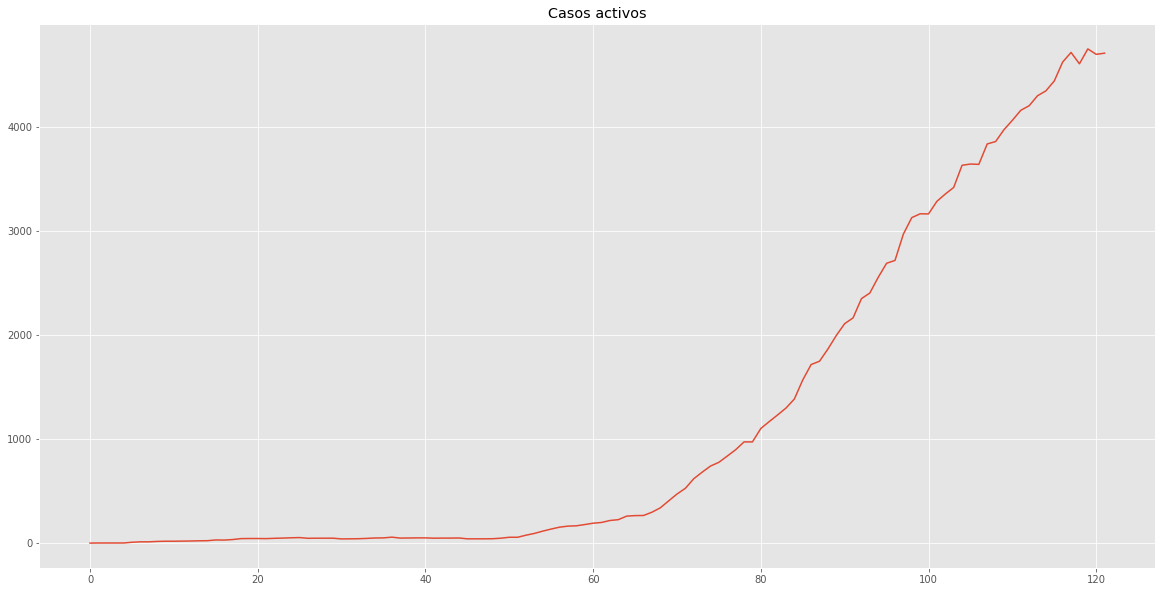

In [ ]:
plt.style.use('ggplot')
full1.plot(title='Casos activos', figsize=(20,10));

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
full1=scaler.fit_transform(np.array(full1).reshape(-1,1))
print(full1)

[[0.00000000e+00]
 [2.10659364e-04]
 [2.10659364e-04]
 [2.10659364e-04]
 [2.10659364e-04]
 [1.68527491e-03]
 [2.52791237e-03]
 [2.52791237e-03]
 [3.37054982e-03]
 [3.79186855e-03]
 [3.79186855e-03]
 [4.00252791e-03]
 [4.21318728e-03]
 [4.63450600e-03]
 [4.84516537e-03]
 [6.31978091e-03]
 [6.10912155e-03]
 [7.16241837e-03]
 [9.05835264e-03]
 [9.26901201e-03]
 [9.26901201e-03]
 [9.05835264e-03]
 [9.69033074e-03]
 [1.01116495e-02]
 [1.07436276e-02]
 [1.11649463e-02]
 [9.69033074e-03]
 [9.90099010e-03]
 [9.90099010e-03]
 [9.90099010e-03]
 [8.42637455e-03]
 [8.63703392e-03]
 [8.84769328e-03]
 [9.47967137e-03]
 [1.03223088e-02]
 [1.05329682e-02]
 [1.20075837e-02]
 [1.01116495e-02]
 [1.03223088e-02]
 [1.05329682e-02]
 [1.05329682e-02]
 [9.90099010e-03]
 [1.01116495e-02]
 [1.01116495e-02]
 [1.03223088e-02]
 [8.63703392e-03]
 [8.63703392e-03]
 [8.63703392e-03]
 [8.84769328e-03]
 [9.90099010e-03]
 [1.17969244e-02]
 [1.17969244e-02]
 [1.60101116e-02]
 [1.95913208e-02]
 [2.42258268e-02]
 [2.843901

In [ ]:
training_size=int(len(full1)*0.65)
test_size=len(full1)-training_size
train_data,test_data=full1[0:training_size,:],full1[training_size:len(full1),:1]

In [ ]:
training_size,test_size

(79, 43)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 36
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)


(42, 36)
(42,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(6, 36)
(6,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(10,return_sequences=True,input_shape=(36,1)))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 36, 10)            480       
                                                                 
 lstm_76 (LSTM)              (None, 36, 10)            840       
                                                                 
 lstm_77 (LSTM)              (None, 10)                840       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 36, 10)            480       
                                                                 
 lstm_76 (LSTM)              (None, 36, 10)            840       
                                                                 
 lstm_77 (LSTM)              (None, 10)                840       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.0041 - val_loss: 0.6053
Epoch 2/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0035 - val_loss: 0.5759
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0029 - val_loss: 0.5463
Epoch 4/100
1/1 [==============================] - 0s 86ms/step - loss: 0.0025 - val_loss: 0.5165
Epoch 5/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0022 - val_loss: 0.4872
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0020 - val_loss: 0.4590
Epoch 7/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0020 - val_loss: 0.4336
Epoch 8/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0021 - val_loss: 0.4129
Epoch 9/100
1/1 [==============================] - 0s 93ms/step - loss: 0.0022 - val_loss: 0.3983
Epoch 10/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0023 - val_loss: 0.3894
Epoch 11/100
1/1 [===

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

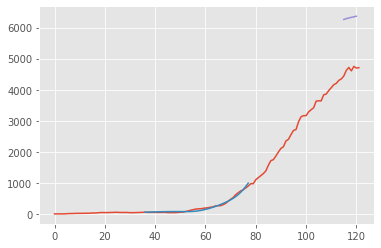

In [ ]:
look_back=36
trainPredictPlot = np.empty_like(full1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(full1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(full1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(full1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

43

In [ ]:
x_input=test_data[6:].reshape(1,-1)
x_input.shape

(1, 37)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.33010322308826623,
 0.361280808931957,
 0.3680219085738361,
 0.39266905413945646,
 0.42005477143459025,
 0.4440699389087845,
 0.4556562039182641,
 0.4946281862228776,
 0.5060037918685486,
 0.5378133558036655,
 0.5662523699178429,
 0.5719401727406783,
 0.6252369917842848,
 0.6585211712660628,
 0.6663155677269855,
 0.6661049083631768,
 0.6915946913840321,
 0.7063408468506426,
 0.719612386770592,
 0.7644828312618496,
 0.7670107436275543,
 0.7663787655361282,
 0.8076680008426375,
 0.8125131662102381,
 0.8365283336844324,
 0.8554876764272172,
 0.8757109753528545,
 0.8849799873604381,
 0.9052032862860755,
 0.9151042763850853,
 0.9351169159469138,
 0.9734569201601011,
 0.9928375816305035,
 0.9698757109753529,
 1.0,
 0.9890457130819466,
 0.9913629660838424]

In [ ]:
lst_output=[]
n_steps=36
i=0
while(i<30):
    
    if(len(temp_input)>36):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.36128081 0.36802191 0.39266905 0.42005477 0.44406994 0.4556562
 0.49462819 0.50600379 0.53781336 0.56625237 0.57194017 0.62523699
 0.65852117 0.66631557 0.66610491 0.69159469 0.70634085 0.71961239
 0.76448283 0.76701074 0.76637877 0.807668   0.81251317 0.83652833
 0.85548768 0.87571098 0.88497999 0.90520329 0.91510428 0.93511692
 0.97345692 0.99283758 0.96987571 1.         0.98904571 0.99136297]
0 day output [[1.34608]]
1 day input [0.36802191 0.39266905 0.42005477 0.44406994 0.4556562  0.49462819
 0.50600379 0.53781336 0.56625237 0.57194017 0.62523699 0.65852117
 0.66631557 0.66610491 0.69159469 0.70634085 0.71961239 0.76448283
 0.76701074 0.76637877 0.807668   0.81251317 0.83652833 0.85548768
 0.87571098 0.88497999 0.90520329 0.91510428 0.93511692 0.97345692
 0.99283758 0.96987571 1.         0.98904571 0.99136297 1.34607995]
1 day output [[1.3495809]]
2 day input [0.39266905 0.42005477 0.44406994 0.4556562  0.49462819 0.50600379
 0.53781336 0.56625237 0.57194017 0.6252

In [ ]:
day_new=np.arange(1,50)
day_pred=np.arange(50,80)

In [ ]:
len(full1)

122

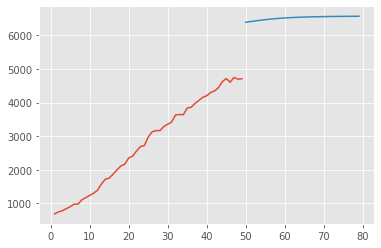

In [ ]:
plt.plot(day_new,scaler.inverse_transform(full1[73:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

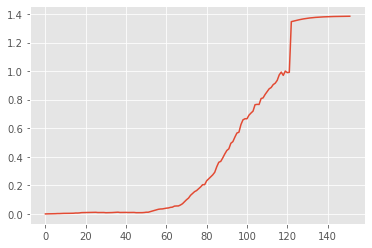

In [ ]:
full3=full1.tolist()
full3.extend(lst_output)
plt.plot(full3[:])

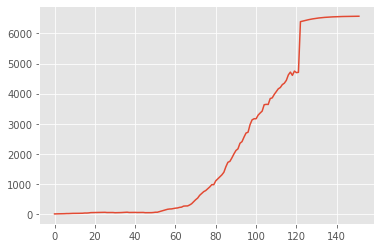

In [ ]:
full3=scaler.inverse_transform(full3).tolist()
plt.plot(full3)